# Analysis of Vehicles dataset (Beginner's Analysis)

1.2 Million Used Car Listings
1.2 Million listings scraped from TrueCar.com - Price, Mileage, Make, Model

link: https://www.kaggle.com/jpayne/852k-used-car-listings

In [1]:
import sys
print(sys.executable)

E:\ProgramData\Anaconda3\python.exe


## 1. First we import necessary Libaries

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

## 2.Reading and Exploring the Data

### Load Vehicles Data

In [3]:
vehicles = pd.read_csv("datasets/true_car_listings.csv")
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852122 entries, 0 to 852121
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Price    852122 non-null  int64 
 1   Year     852122 non-null  int64 
 2   Mileage  852122 non-null  int64 
 3   City     852122 non-null  object
 4   State    852122 non-null  object
 5   Vin      852122 non-null  object
 6   Make     852122 non-null  object
 7   Model    852122 non-null  object
dtypes: int64(3), object(5)
memory usage: 52.0+ MB


In [4]:
vehicles.sample(5)

,Price,Year,Mileage,City,State,Vin,Make,Model
665740,22176,2017,653,Kenner,LA,KNMAT2MT0HP522965,Nissan,RogueS
511135,19990,2013,42676,Westbrook,ME,1C4RJFAG5DC643872,Jeep,Grand
444232,9995,2014,100112,Lithia Springs,GA,KMHDH4AE1EU137875,Hyundai,Elantra4dr
109795,13872,2016,9302,Nelliston,NY,1G1PE5SBXG7116487,Chevrolet,Cruze
701382,45577,2017,17735,Fairlawn,NJ,WP1AA2A51HLB00740,Porsche,MacanAWD


In [5]:
vehicles.describe()

,Price,Year,Mileage
count,852122.000000,852122.000000,8.521220e+05
mean,21464.100210,2013.289145,5.250779e+04
std,13596.202241,3.414987,4.198896e+04
min,1500.000000,1997.000000,5.000000e+00
25%,13000.000000,2012.000000,2.383600e+04
50%,18500.000000,2014.000000,4.025600e+04
75%,26995.000000,2016.000000,7.218600e+04
max,499500.000000,2018.000000,2.856196e+06


In [6]:
vehicles.shape

(852122, 8)

## 3 Dataset for car from 1970 and price is not greater than 50k

### 3.1 Data Analysis

In [7]:
vehicle_top_price = vehicles.loc[(vehicles.Year>=1970) & (vehicles.Price>=1000) & (vehicles.Price<=50000) 
                                 & (vehicles.Mileage<=300000)].loc[:, ['Price', 'Year', 
                                                                                'Mileage', 'City', 'State', 'Make', 'Model']]
vehicle_top_price.shape

(830059, 7)

In [8]:
vehicle_top_price.sample(5)

,Price,Year,Mileage,City,State,Make,Model
474729,30997,2014,34684,Jacksonville,FL,INFINITI,Q60
845978,7994,2006,91757,Fairfield,OH,Volkswagen,Jetta
650839,10995,2013,48570,Los Angeles,CA,Nissan,SentraSR
771354,14990,2012,61372,Pinellas Park,FL,Toyota,RAV4FWD
627921,14790,2015,22574,Fredericksburg,VA,Mitsubishi,Outlander


In [9]:
vehicle_top_price.describe()

,Price,Year,Mileage
count,830059.000000,830059.000000,830059.000000
mean,20210.714328,2013.237171,53198.364920
std,9732.591999,3.420433,40821.316722
min,1500.000000,1997.000000,5.000000
25%,12995.000000,2012.000000,24558.000000
50%,18000.000000,2014.000000,40957.000000
75%,26020.500000,2016.000000,73322.000000
max,50000.000000,2018.000000,300000.000000


In [10]:
vehicle_top_price.dtypes

Price       int64
Year        int64
Mileage     int64
City       object
State      object
Make       object
Model      object
dtype: object

### 3.2 Cleaning of data

In [11]:
vehicle_top_price.isnull().any()

Price      False
Year       False
Mileage    False
City       False
State      False
Make       False
Model      False
dtype: bool

In [12]:
vehicle_top_price.isnull().sum()

Price      0
Year       0
Mileage    0
City       0
State      0
Make       0
Model      0
dtype: int64

In [13]:
# lets drop null rows
vehicle_top_price = vehicle_top_price.dropna()

In [14]:
vehicle_top_price.shape

(830059, 7)

### 3.3 Understand the relation between Price and the number of Class

In [15]:
# vehicle_top_price['Price'].plot.hist(figsize=(15,5), bins=7, alpha=0.7, rwidth=0.5, grid=True)
# vehicle_top_price['Price'].plot.hist(figsize=(15,5), bins=10, alpha=0.7, rwidth=0.5, grid=True)
# vehicle_top_price['Price'].plot.hist(figsize=(15,5), bins=12, alpha=0.7, rwidth=0.5, grid=True)

#### 3.3.1 Equal-Width Binning:

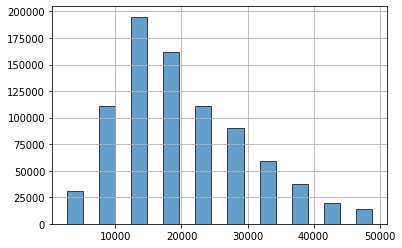

In [16]:
#create histogram with equal-width bins
n, bins, patches = plt.hist(vehicle_top_price['Price'], edgecolor='black', alpha=0.7, rwidth=0.5)
plt.grid(True)
plt.show()

In [17]:
#display bin boundaries and frequency per bin 
num_class = len(bins) - 1
num_class, bins, n

(10,
 array([ 1500.,  6350., 11200., 16050., 20900., 25750., 30600., 35450.,
        40300., 45150., 50000.]),
 array([ 31065., 111154., 195025., 162034., 110875.,  90624.,  58890.,
         37314.,  19360.,  13718.]))

#### 3.3.2 Equal-Frequency Binning:

In [18]:
#define function to calculate equal-frequency bins 
def equalObs(x, nbin):
    nlen = len(x)
    return np.interp(np.linspace(0, nlen, nbin + 1),
                     np.arange(nlen),
                     np.sort(x))

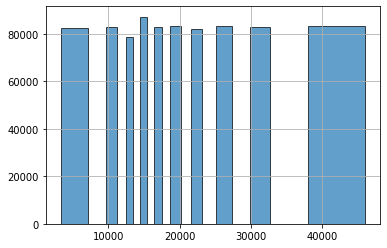

In [19]:
#create histogram with equal-frequency bins 
n, bins, patches = plt.hist(vehicle_top_price['Price'], 
                            equalObs(vehicle_top_price['Price'], num_class), edgecolor='black', alpha=0.7, rwidth=0.5)
plt.grid(True)
plt.show()

In [20]:
#display bin boundaries and frequency per bin 
num_class, bins, n

(10,
 array([ 1500.,  8998., 11995., 13995., 15997., 18000., 20870., 24000.,
        28495., 34000., 50000.]),
 array([82666., 83149., 78683., 87305., 82983., 83247., 82319., 83547.,
        82963., 83197.]))

### 3.4 EDA

In [21]:
import pandas_profiling as pp

In [22]:
# profile = pp.ProfileReport(vehicle_top_price, title='Pandas Profiling Report', explorative=True)
# profile.to_widgets()
# # profile.to_notebook_iframe()

### 3.3 Normalize the Data
Used Cars Price Prediction by 15 models
https://www.kaggle.com/vbmokin/used-cars-price-prediction-by-15-models

In [23]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [25]:
# https://stackoverflow.com/a/53028100 
# vehicle_top_price['class'] = pd.cut(vehicle_top_price.Price, bins=num_class, labels=np.arange(num_class), right=False)

vehicle_top_price['class'], price_bins = pd.qcut(vehicle_top_price.Price, q=num_class, labels=False, retbins=True)
vehicle_top_price = vehicle_top_price.drop(['Price'], axis=1)

price_bins

array([ 1500.,  8998., 11995., 13995., 15997., 18000., 20870., 24000.,
       28495., 34000., 50000.])

In [25]:
car_year_min = vehicle_top_price['Year'].min()
vehicle_top_price['Year'] = (vehicle_top_price['Year'] - car_year_min).astype(int)

In [26]:
car_mileage_mean = vehicle_top_price['Mileage'].mean()
vehicle_top_price['Mileage'] = (vehicle_top_price['Mileage'] / car_mileage_mean).astype('float64')

In [27]:
# # perform one hot encoding on multiple categorical columns: https://datascience.stackexchange.com/a/71805
# # https://stackoverflow.com/a/44601764
# vehicle_top_price = pd.get_dummies(vehicle_top_price, columns=['City', 'State', 'Make', 'Model'], drop_first=True)
# vehicle_top_price.columns

In [28]:
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
for col in ['City', 'State', 'Make', 'Model']:
    le = LabelEncoder()
    le.fit(list(vehicle_top_price[col].astype(str).values))
    vehicle_top_price[col] = le.transform(list(vehicle_top_price[col].astype(str).values))
    le.get_params()

In [29]:
vehicle_top_price.sample(5)

,Year,Mileage,City,State,Make,Model,class
533821,17,1.237500,666,18,26,1493,4
83367,17,0.812168,1018,49,8,785,9
796038,13,2.203056,1008,11,49,594,0
470149,17,0.514358,29,37,22,1615,7
74367,18,0.414712,35,44,8,1911,8


In [30]:
vehicle_top_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 830059 entries, 0 to 852112
Data columns (total 7 columns):
 #   Column   Non-Null Count   Dtype   
---  ------   --------------   -----   
 0   Year     830059 non-null  int32   
 1   Mileage  830059 non-null  float64 
 2   City     830059 non-null  int64   
 3   State    830059 non-null  int64   
 4   Make     830059 non-null  int64   
 5   Model    830059 non-null  int64   
 6   class    830059 non-null  category
dtypes: category(1), float64(1), int32(1), int64(4)
memory usage: 42.0 MB


In [31]:
vehicle_top_price.corr()

,Year,Mileage,City,State,Make,Model
Year,1.000000,-0.782312,0.009298,-0.022387,0.024514,-0.022300
Mileage,-0.782312,1.000000,-0.012386,0.025813,-0.035595,0.048124
City,0.009298,-0.012386,1.000000,-0.046721,0.007524,-0.002942
State,-0.022387,0.025813,-0.046721,1.000000,-0.004614,0.003605
Make,0.024514,-0.035595,0.007524,-0.004614,1.000000,0.034746
Model,-0.022300,0.048124,-0.002942,0.003605,0.034746,1.000000


In [32]:
vehicle_top_price.describe()

,Year,Mileage,City,State,Make,Model
count,830059.000000,830059.000000,830059.00000,830059.000000,830059.000000,830059.000000
mean,16.237171,1.000000,1236.28414,27.770590,23.709622,1171.423205
std,3.420433,0.767342,719.32115,17.230939,14.559218,711.668635
min,0.000000,0.000094,0.00000,0.000000,0.000000,0.000000
25%,15.000000,0.461631,596.00000,11.000000,11.000000,594.000000
50%,17.000000,0.769892,1219.00000,27.000000,20.000000,1043.000000
75%,19.000000,1.378275,1851.00000,44.000000,37.000000,1882.000000
max,21.000000,5.639271,2551.00000,58.000000,52.000000,2551.000000


In [33]:
vehicle_top_price.groupby('class').size()

class
0    83050
1    86828
2    79210
3    83196
4    84101
5    81674
6    83309
7    82816
8    83237
9    82638
dtype: int64

### 3.4 EDA

In [34]:
# profile_n = pp.ProfileReport(vehicle_top_price, title='Pandas Profiling Report')
# profile_n.to_widgets()

### 3.5 Classification  

In [35]:
from sklearn.model_selection import KFold, train_test_split

from sklearn.metrics import accuracy_score, balanced_accuracy_score

# models
from sklearn.linear_model import LinearRegression, SGDRegressor, RidgeCV
from sklearn.svm import SVC

from sklearn.neural_network import MLPClassifier

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [36]:
def accuracy_model(clf, train_x, test_x, train_y, test_y):    
    clf.fit(train_x, train_y)

    print("\n### training performance")
    pred_train = clf.predict(train_x)
    acc_train_r2_num = round(balanced_accuracy_score(train_y, pred_train) * 100, 2)
    print('accuracy for training =', acc_train_r2_num)

    print("### Test performance")    
    pred_y = clf.predict(test_x)
    acc_train_r2_num = round(accuracy_score(test_y, pred_y) * 100, 2)
    print('Accuracy score for testing =', acc_train_r2_num) 
    
    return acc_train_r2_num

In [37]:
#added some parameters
# https://stackoverflow.com/a/45116022
k_fold_5 = KFold(n_splits = 5, shuffle = True, random_state = 2)

In [38]:
target_name = 'class'
train_target = vehicle_top_price[target_name]

vehicle_top_price = vehicle_top_price.drop([target_name], axis=1)
vehicle_top_price.sample(5)

,Year,Mileage,City,State,Make,Model
220134,17,1.216654,1596,18,11,1043
60196,18,0.664513,737,19,7,740
133026,17,1.933668,900,32,9,2180
15942,11,1.927352,1259,39,4,170
291751,19,0.441217,1579,44,14,711


In [39]:
vehicle_top_price = StandardScaler().fit_transform(vehicle_top_price)
train0, test0, train_target0, test_target0 = train_test_split(vehicle_top_price, train_target, 
                                                              stratify=train_target[:], 
                                                              test_size=0.2, random_state=0)

In [40]:
uniqueValues, occurCount = np.unique(train_target0, return_counts=True)
uniqueValues, occurCount

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64),
 array([66440, 69462, 63368, 66557, 67281, 65339, 66647, 66253, 66590,
        66110], dtype=int64))

Class: [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11] <br>

    Dataset Dist:  [21160, 70933, 135175, 163852, 128996, 90037, 74626, 55841, 38631, 23406, 15236, 12166]
    Training Dist: [16928, 56746, 108140, 131081, 103197, 72029, 59701, 44673, 30905, 18725, 12189,  9733]

In [41]:
# https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

names = ["Nearest Neighbors", 
#          "Linear SVM", "RBF SVM", 
#          "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
#     SVC(kernel="linear", C=0.025),
#     SVC(gamma=2, C=1),
#     GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

print("# Number of Class:", num_class)
for name, clf in zip(names, classifiers):
    print("\n## Training for {} starting ****".format(name))
    accuracy_scores = []
    for train_index, test_index in k_fold_5.split(train0):
        train_x = train0[train_index][:]
        test_x  = train0[test_index][:]

        train_y =  train_target0.iloc[train_index][:]
        test_y  =  train_target0.iloc[test_index][:]

        accuracy_scores.append(accuracy_model(clf, train_x, test_x, train_y, test_y))
    print("\nAvg Accuracy Score:", round(np.mean(accuracy_scores), 3))

# Number of Class: 10

## Training for Nearest Neighbors starting ****

### training performance
accuracy for training = 63.03
### Test performance
Accuracy score for testing = 36.63
Balanced accuracy score for testing = 36.53

### training performance
accuracy for training = 63.07
### Test performance
Accuracy score for testing = 36.53
Balanced accuracy score for testing = 36.49

### training performance
accuracy for training = 63.01
### Test performance
Accuracy score for testing = 36.64
Balanced accuracy score for testing = 36.57

### training performance
accuracy for training = 62.99
### Test performance
Accuracy score for testing = 36.49
Balanced accuracy score for testing = 36.51

### training performance
accuracy for training = 62.95
### Test performance
Accuracy score for testing = 36.55
Balanced accuracy score for testing = 36.51

Avg Accuracy Score: 36.522

## Training for Decision Tree starting ****

### training performance
accuracy for training = 24.0
### Test performance


### 3.5.1 yellowbrick

In [43]:
from yellowbrick.classifier import ClassPredictionError

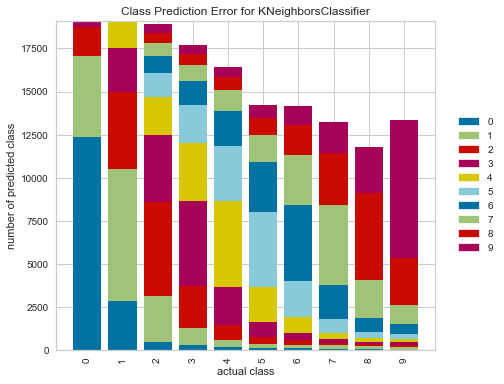

<AxesSubplot:title={'center':'Class Prediction Error for KNeighborsClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [45]:
# Instantiate the classification model and visualizer
visualizer = ClassPredictionError(KNeighborsClassifier(3), classes=np.arange(num_class))

# Fit the training data to the visualizer
visualizer.fit(train0, train_target0)

# Evaluate the model on the test data
visualizer.score(test0, test_target0)

# Draw visualization
visualizer.show()